In [32]:
# imports
import face_recognition
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def info(img):
    assert isinstance(img,np.ndarray), 'Not a numpy array'
    return type(img), img.shape

In [5]:
# load an image
moaz_image = face_recognition.load_image_file('imgs/moaz.jpeg')
type(moaz_image), moaz_image.shape

(numpy.ndarray, (900, 675, 3))

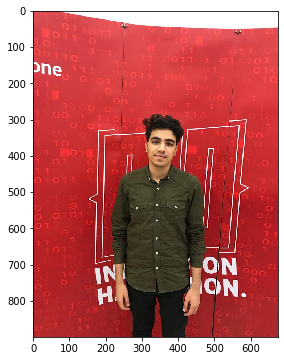

In [11]:
plt.figure(figsize=(10, 6))
plt.imshow(moaz_image)
plt.show()

In [18]:
# get the embeddings
%timeit -n 10 moaz_embeddings = face_recognition.face_encodings(moaz_image)
len(moaz_embeddings)

440 ms ± 13.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


1

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 345, Left: 320, Bottom: 420, Right: 395


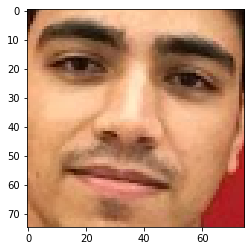

In [21]:
# Load the jpg file into a numpy array
image = face_recognition.load_image_file("imgs/moaz.jpeg")

# Find all the faces in the image using the default HOG-based model.
# This method is fairly accurate, but not as accurate as the CNN model and not GPU accelerated.
# See also: find_faces_in_picture_cnn.py
face_locations = face_recognition.face_locations(image)

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    plt.imshow(pil_image)

In [30]:
pil_image = np.array(pil_image)
info(pil_image)

(numpy.ndarray, (75, 75, 3))

In [31]:
# get the embeddings using only the face
%timeit -n 10 moaz_embeddings = face_recognition.face_encodings(pil_image)
len(moaz_embeddings)

66.4 ms ± 5.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


1

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 345, Left: 320, Bottom: 420, Right: 395
Embeddings: 128
CPU times: user 571 ms, sys: 105 ms, total: 676 ms
Wall time: 421 ms


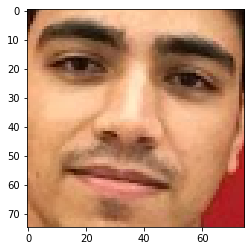

In [43]:
%%time
# Load image -> get face location -> get encodings of the face

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("imgs/moaz.jpeg")

# Find all the faces in the image using the default HOG-based model.
# This method is fairly accurate, but not as accurate as the CNN model and not GPU accelerated.
# See also: find_faces_in_picture_cnn.py
face_locations = face_recognition.face_locations(image)

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    plt.imshow(pil_image)

pil_image = np.array(pil_image)
# get the embeddings using only the face
moaz_embeddings = face_recognition.face_encodings(pil_image)[0]
print("Embeddings:", len(moaz_embeddings))

In [47]:
%%timeit -n 10
moaz_image = face_recognition.load_image_file('imgs/moaz.jpeg')
moaz_embeddings = face_recognition.face_encodings(moaz_image)

441 ms ± 5.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [48]:
%%timeit -t 10
moaz_image = face_recognition.load_image_file('imgs/moaz.jpeg')
face_locations = face_recognition.face_locations(image)

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
pil_image = np.array(pil_image)
moaz_embeddings = face_recognition.face_encodings(pil_image)

439 ms ± 8.09 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
